# VGG模型使用
目的：
* 了解VGG的架构
* 了解有关卷积神经网络更多知识
* 如何在keras中实施某种网络结构
* 阅读论文原文，了解更多底层原理和原始构想

* VGG论文：[VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION](https://arxiv.org/pdf/1409.1556v6.pdf)

* VGG的几类模型结构：
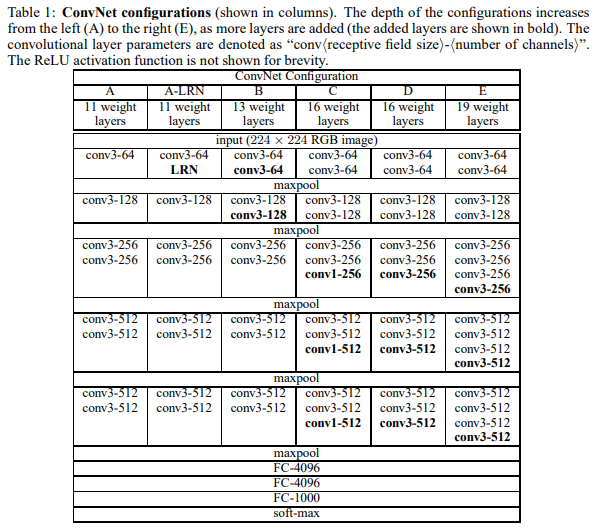
* D的模型结构：
input: 224 * 224 RGB图片
过滤器：3 * 3
卷积步长：1个像素
填充：1个像素
池化层：2 * 2
两个全连接层：4096个神经元/层
softmax分类层：1000（1000个类别）
激励函数：Relu

## 引入相关库文件

In [1]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import plot_model

## 创建模型

In [3]:
input_shape = (244,244,3) 
#RGB彩色图像244 x 244.（高，宽，channel）

model = Sequential()
#第一个卷积块
model.add(Conv2D(64,(3,3),padding = 'same',activation='relu',
                 input_shape=input_shape,name='block1_conv1'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu',
                name='block_conv2'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block1_pool'))
#第二个卷积块
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block2_pool'))
#第3个卷积块
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block3_pool'))
#第4个卷积块
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block4_pool'))
#第5个卷积块
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block5_pool'))
#前馈全连接层块
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dense(1000, activation='softmax', name='predictions'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block_conv2 (Conv2D)         (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0         
_________________________________________________________________
bloc

# 函数模型